In [575]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams["figure.figsize"] = (9, 6)

In [564]:
# complication - 1. ophthalmic 2. all complications
final_t2 = pd.read_csv('final_t2db_clinical.csv')
str_filter = final_t2[final_t2['value1'].isin(['^'])].index
final_t2.drop(str_filter, axis=0, inplace=True)

In [576]:
final_t2.shape

(16769512, 10)

## BP(mmHg)

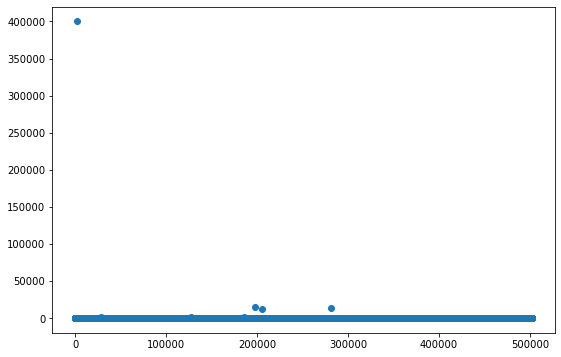

In [567]:
# bp sys 
target = pd.concat([final_t2[final_t2['read_2'].isin(['246..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['2469.'])]['value1']])
Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

(0, 500)

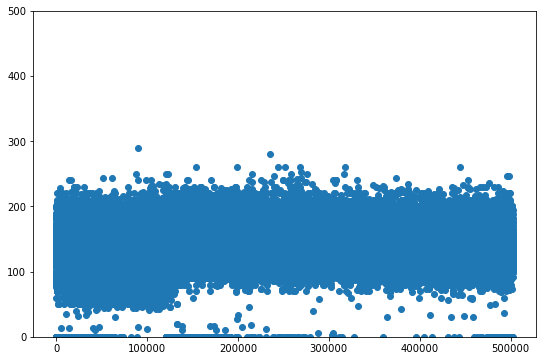

In [568]:
plt.scatter(np.arange(len(Target)), Target.values)
plt.ylim((0, 500))

In [515]:
# bp swap
dia_r2 = final_t2[final_t2['read_2'].isin(['246..'])]
dia_swap = dia_r2[dia_r2['value1'].astype(np.float) < dia_r2['value2'].astype(np.float)].index
keep_dia, keep_sys = final_t2.loc[dia_swap, 'value1'], final_t2.loc[dia_swap, 'value2']
final_t2.loc[dia_swap, 'value1'] = keep_sys
final_t2.loc[dia_swap, 'value2'] = keep_dia

In [516]:
# sys filtering
target = pd.concat([final_t2[final_t2['read_2'].isin(['246..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['2469.'])]['value1']])
Target = target.astype(np.float)

print(len(Target[Target > 250]))
sys_bp_upper = Target[Target > 250].index

print(len(Target[(Target < 50) & (Target > 0)]))
sys_bp_lower = Target[(Target < 50) & (Target > 10)].index

final_t2.drop(np.union1d(sys_bp_upper, sys_bp_lower), axis=0, inplace=True)

20
32


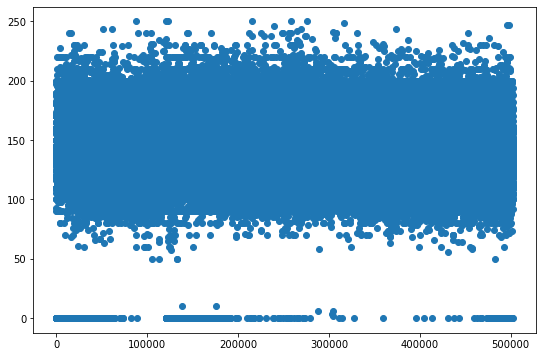

In [517]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['246..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['2469.'])]['value1']])
Target = target.astype(np.float)

plt.scatter(np.arange(len(Target)), Target.values)

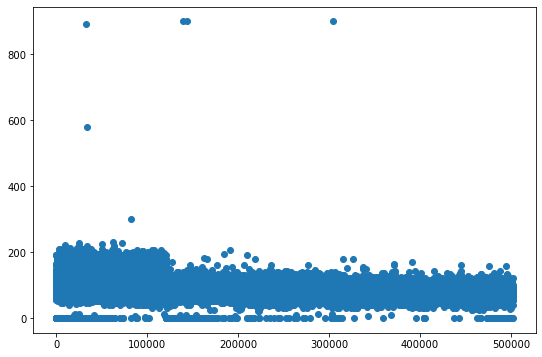

In [569]:
# bp dia
target = pd.concat([final_t2[final_t2['read_2'].isin(['246..'])]['value2'], 
                    final_t2[final_t2['read_3'].isin(['246A.'])]['value1']])
Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)


(0, 500)

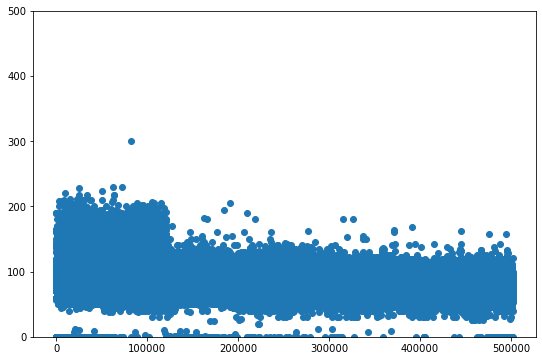

In [570]:
# bp dia
target = pd.concat([final_t2[final_t2['read_2'].isin(['246..'])]['value2'], 
                    final_t2[final_t2['read_3'].isin(['246A.'])]['value1']])
Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)
plt.ylim((0, 500))

In [519]:
# dia filtering
print(len(Target[Target > 160]))
dia_upper = Target[Target > 160].index

print(len(Target[(Target > 0) & (Target < 20)]))
dia_lower = Target[(Target > 0) & (Target < 20)].index

final_t2.drop(np.union1d(dia_upper, dia_lower), axis=0, inplace=True)

21
33


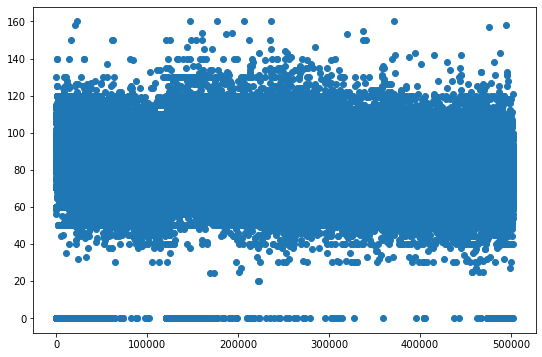

In [520]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['246..'])]['value2'], 
                    final_t2[final_t2['read_3'].isin(['246A.'])]['value1']])
Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

## Weight(kg)

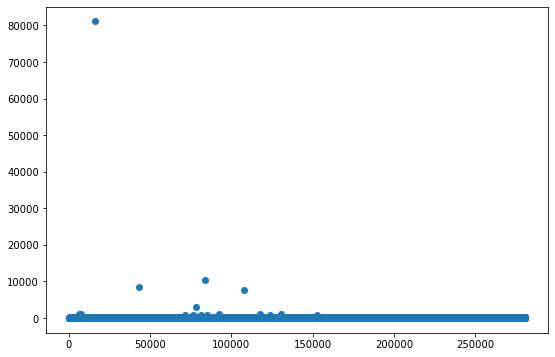

In [521]:
# weight
target = pd.concat([final_t2[final_t2['read_2'].isin(['22A..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['22A..'])]['value1']])
Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)


(0, 2000)

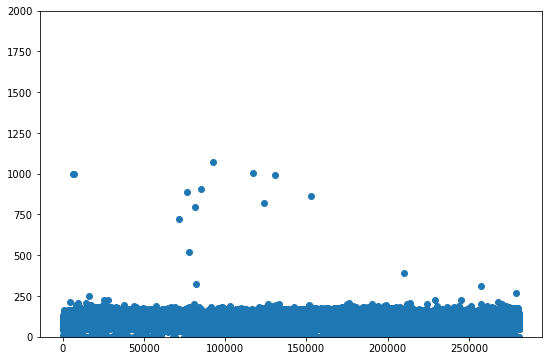

In [522]:
plt.scatter(np.arange(len(Target)), Target.values)
plt.ylim((0, 2000))

In [523]:
# weight filter
print(len(Target[Target > 250]))
weight_upper = Target[Target > 250].index

print(len(Target[(Target > 0) & (Target < 30)]))
weight_lower = Target[(Target > 0) & (Target < 30)].index

final_t2.drop(np.union1d(weight_upper, weight_lower), axis=0, inplace=True)

22
428


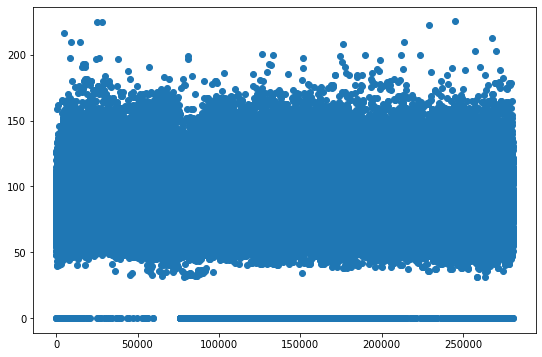

In [524]:
# weight
target = pd.concat([final_t2[final_t2['read_2'].isin(['22A..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['22A..'])]['value1']])
Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

## Hba1c(%)

(0, 300)

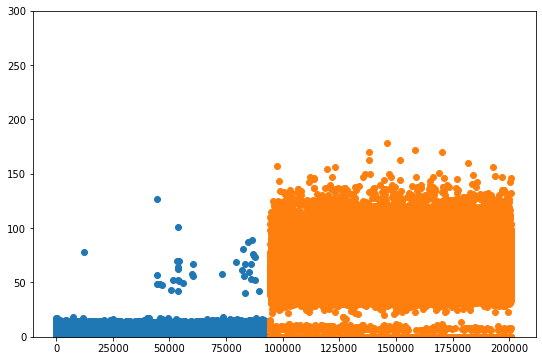

In [574]:
# Hba1c
# ['42W4.', 'XaERp']
target = pd.concat([final_t2[final_t2['read_2'].isin(['42W4..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['XaERp'])]['value1']])

target2 = pd.concat([final_t2[final_t2['read_2'].isin(['42W5..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['XaPbt'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

keep_val2_opr33 = final_t2.loc[target2[target2 == 'OPR003'].index]['value2']
target2[target2 == 'OPR003'] = keep_val2_opr33
# keep_val2_opr2 = final_t2.loc[target[target == 'OPR002'].index]['value2']
# target[target == 'OPR002'] = keep_val2_opr2

Target = target.astype(np.float)
Target2 = target2.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)
plt.scatter(np.arange(len(Target), len(Target)+len(Target2)), Target2.values)

plt.ylim((0, 300))

In [525]:
## read3
hb_r3 = final_t2[final_t2.loc[:, 'read_3'] == 'XaPbt']['value1']
# drop outliers > 240, keep >= 20
ii = hb_r3[hb_r3.astype(np.float) > 240].index
hb_r3.drop(ii, axis=0, inplace=True)
index = hb_r3[hb_r3.astype(np.float) >= 20].index
val = hb_r3[hb_r3.astype(np.float) >= 20].values
# convert IFCC to DCCT
final_t2.loc[index, 'value1'] = val.astype(np.float)*0.09148+2.152
final_t2['read_3'].replace('XaPbt', 'XaERp', inplace=True)


## read2
hb_r2 = final_t2[final_t2.loc[:, 'read_2'] == '42W5.']
# check value2, value3
hb_val2_r2 = hb_r2[hb_r2['value1'] == 'OPR003']['value2']
hb_val1_r2 = hb_r2.drop(hb_val2_r2.index, axis=0)['value1']
# drop outliers > 240, keep < 20
ii2 = hb_val1_r2[hb_val1_r2.astype(np.float) > 240].index
hb_val1_r2.drop(ii2, axis=0, inplace=True)
index2 = hb_val1_r2[hb_val1_r2.astype(np.float) >= 20].index
val2 = hb_val1_r2[hb_val1_r2.astype(np.float) >= 20].values

v2_ii2 = hb_val2_r2[hb_val2_r2.astype(np.float) > 240].index
hb_val2_r2.drop(v2_ii2, axis=0, inplace=True)
v2_index2 = hb_val2_r2[hb_val2_r2.astype(np.float) >= 20].index
v2_val2 = hb_val2_r2[hb_val2_r2.astype(np.float) >= 20].values

# convert IFCC to DCCT
final_t2.loc[index2, 'value1'] = val2.astype(np.float)*0.09148+2.152
final_t2.loc[v2_index2, 'value2'] = v2_val2.astype(np.float)*0.09148+2.152
final_t2.loc[v2_index2, 'value1'] = final_t2.loc[v2_index2, 'value2']
final_t2['read_2'].replace('42W5.', '42W4.', inplace=True)

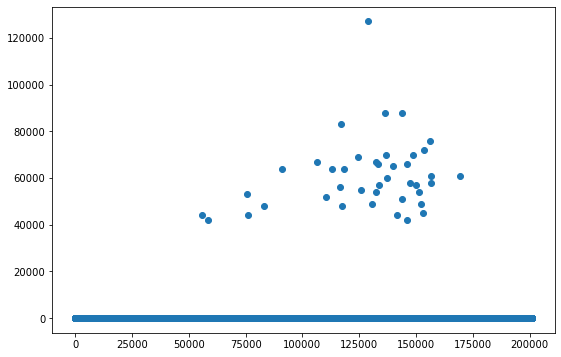

In [526]:
# Hba1c
# ['42W4.', 'XaERp']
target = pd.concat([final_t2[final_t2['read_2'].isin(['42W4..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['XaERp'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

# keep_val2_opr2 = final_t2.loc[target[target == 'OPR002'].index]['value2']
# target[target == 'OPR002'] = keep_val2_opr2

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

In [527]:
print(len(Target[Target > 20]))
hb_upper = Target[Target > 20].index

print(np.sum((Target > 0) & (Target < 2)))
hb_lower = Target[(Target > 0) & (Target < 2)].index

final_t2.drop(np.union1d(hb_upper, hb_lower), axis=0, inplace=True)

78
4


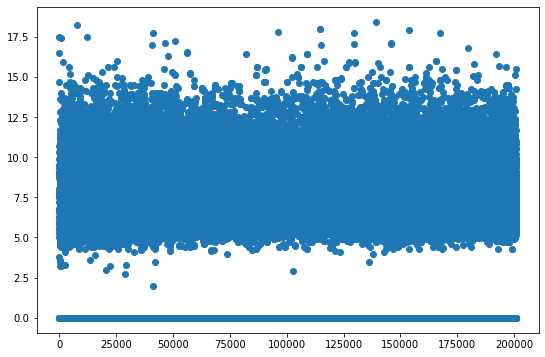

In [528]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['42W4..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['XaERp'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

## Creatinine(micromoles/L)

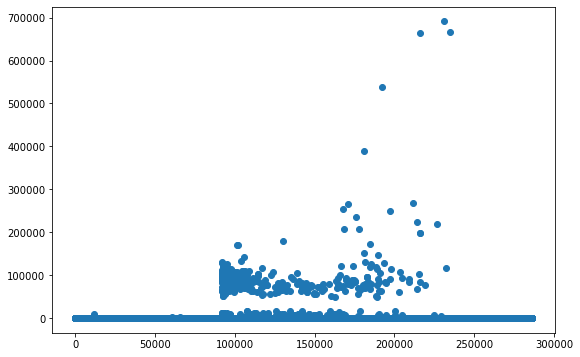

In [529]:
# Cretinine
# '44J3.', 'XE2q5
target = pd.concat([final_t2[final_t2['read_2'].isin(['44J3.'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['XE2q5'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

keep_val2_opr2 = final_t2.loc[target[target == 'OPR002'].index]['value2']
target[target == 'OPR002'] = keep_val2_opr2

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

(0, 5000)

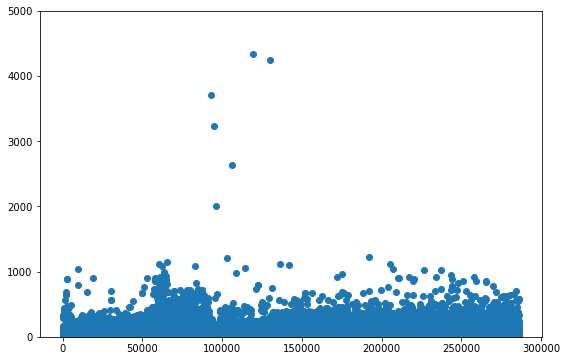

In [530]:
plt.scatter(np.arange(len(Target)), Target.values)
plt.ylim((0, 5000))

In [531]:
# creatinine filter
print(len(Target[Target > 1900]))
creatinine_upper = Target[Target > 1900].index

print(np.sum((Target > 0) & (Target < 20)))
creatinine_lower = Target[(Target > 0) & (Target < 20)].index

final_t2.drop(np.union1d(creatinine_upper, creatinine_lower), axis=0, inplace=True)

632
197


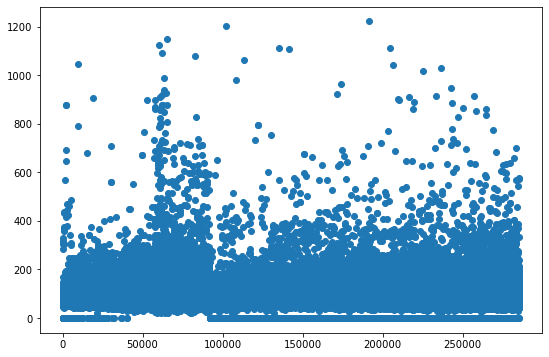

In [532]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['44J3.'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['XE2q5'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

keep_val2_opr2 = final_t2.loc[target[target == 'OPR002'].index]['value2']
target[target == 'OPR002'] = keep_val2_opr2

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

## BMI(kg/m^2)

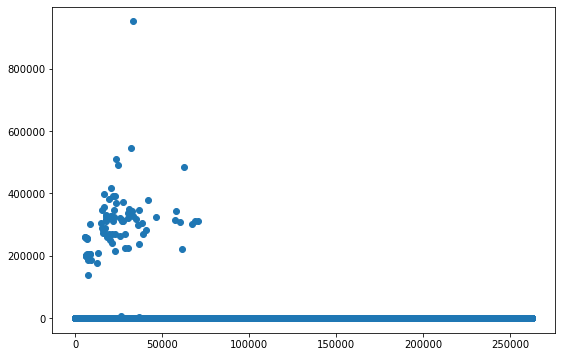

In [533]:
# BMI
target = pd.concat([final_t2[final_t2['read_2'].isin(['22K..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['22K..'])]['value1']])


Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

(0, 500)

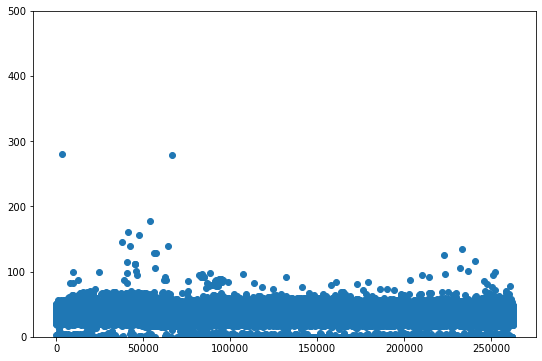

In [534]:
plt.scatter(np.arange(len(Target)), Target.values)
plt.ylim((0, 500))

In [535]:
# BMI filter
print(np.sum(Target > 100))
BMI_upper = Target[Target > 100].index

print(np.sum((Target > 0) & (Target < 15)))
BMI_lower = Target[(Target > 0) & (Target < 15)].index

final_t2.drop(np.union1d(BMI_upper, BMI_lower), axis=0, inplace=True)

114
370


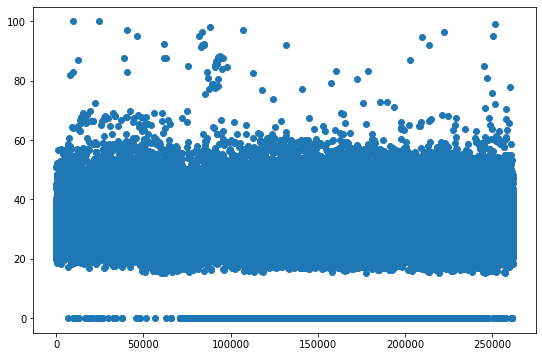

In [536]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['22K..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['22K..'])]['value1']])


Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

## Triglyceride(mmol/L)

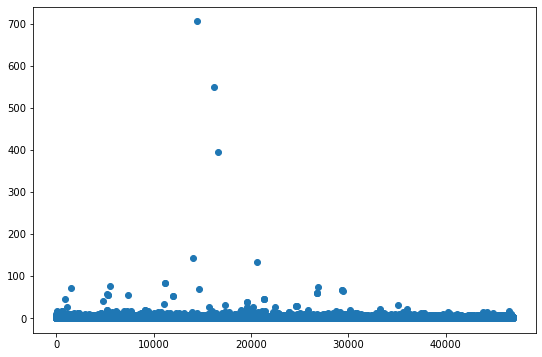

In [537]:
# triglyceride
# '44Q..', 'XE2q9'
target = pd.concat([final_t2[final_t2['read_2'].isin(['44Q..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['XE2q9..'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

# keep_val2_opr2 = final_t2.loc[target[target == 'OPR002'].index]['value2']
# target[target == 'OPR002'] = keep_val2_opr2

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

(0, 40)

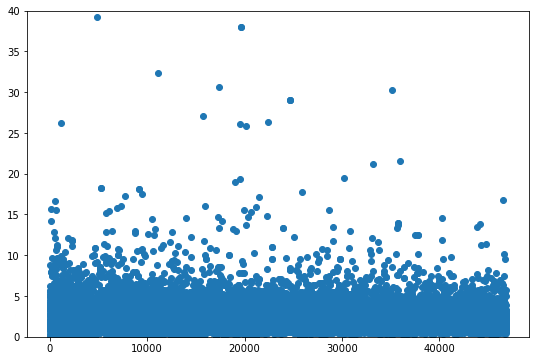

In [538]:
plt.scatter(np.arange(len(Target)), Target.values)
plt.ylim((0, 40))

In [539]:
# Triglyceride filter
print(np.sum(Target > 16))
Tri_upper = Target[Target > 16].index

final_t2.drop(Tri_upper, axis=0, inplace=True)

57


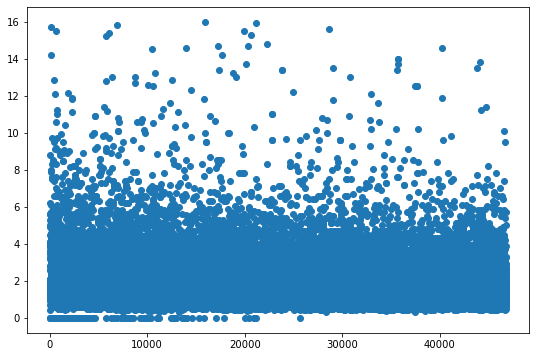

In [540]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['44Q..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['XE2q9..'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

# keep_val2_opr2 = final_t2.loc[target[target == 'OPR002'].index]['value2']
# target[target == 'OPR002'] = keep_val2_opr2

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

## Neutrophil(ANC, 1 = 1000cells/microL)

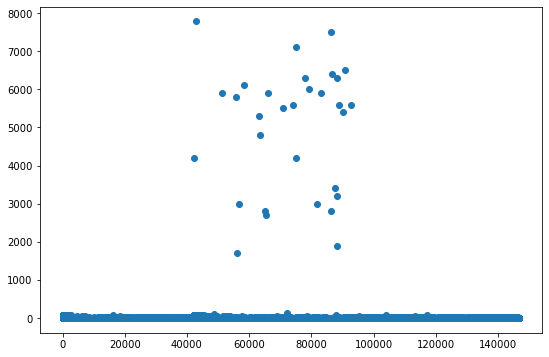

In [541]:
# neutrophil
# ['42J..', '42J..']

target = pd.concat([final_t2[final_t2['read_2'].isin(['42J..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['42J..'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

(0, 40)

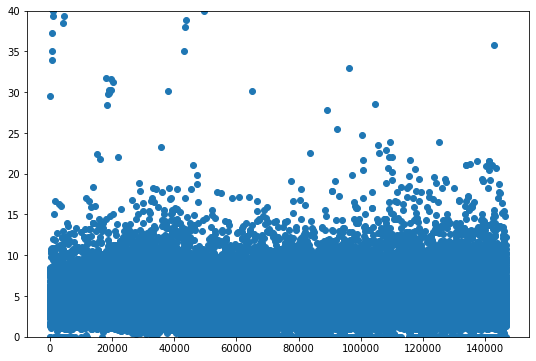

In [542]:
plt.scatter(np.arange(len(Target)), Target.values)
plt.ylim((0, 40))

In [543]:
# Neutrophil filter
print(np.sum(Target > 18))
neutro_upper = Target[(Target > 18)].index

final_t2.drop(neutro_upper, axis=0, inplace=True)

705


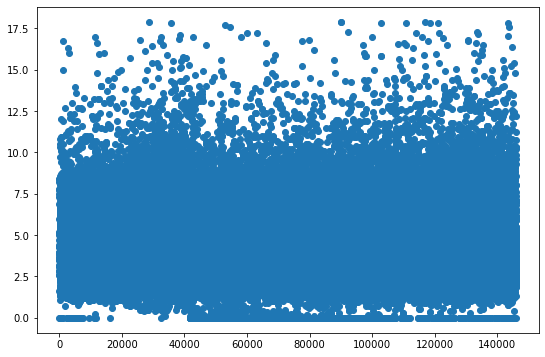

In [544]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['42J..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['42J..'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

## Lymphocyte(ALC, 1 = 1000cells/microL)

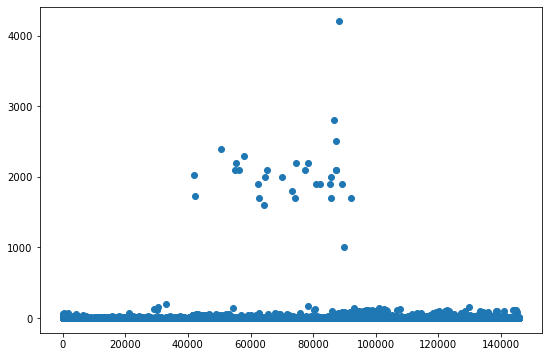

In [545]:
# lymphocyte
# ['42M..', '42M..']

target = pd.concat([final_t2[final_t2['read_2'].isin(['42M..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['42M..'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

(0, 40)

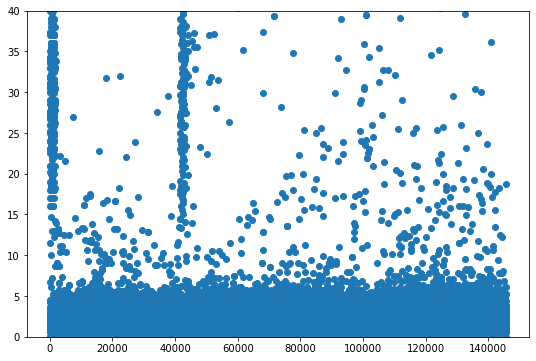

In [546]:
plt.scatter(np.arange(len(Target)), Target.values)
plt.ylim((0, 40))

In [547]:
# Lymphocyte filter
print(np.sum(Target > 16))
lymp_upper = Target[Target > 15].index

final_t2.drop(lymp_upper, axis=0, inplace=True)

826


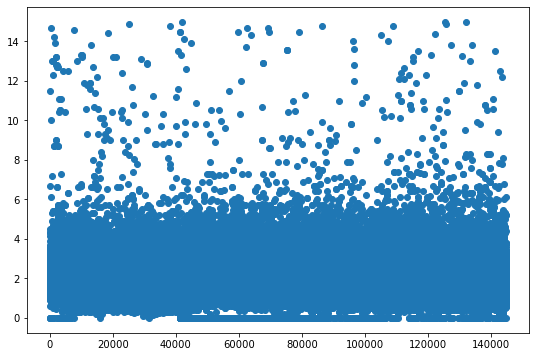

In [548]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['42M..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['42M..'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

## HDL(mmol/L)

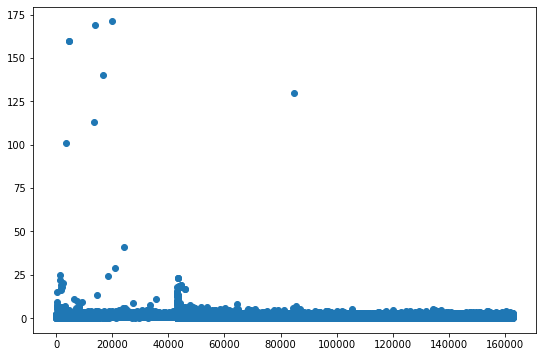

In [549]:
# HDL
# ['44P5.', '44P5.']
target = pd.concat([final_t2[final_t2['read_2'].isin(['44P5.'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['44P5.'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

(0, 10)

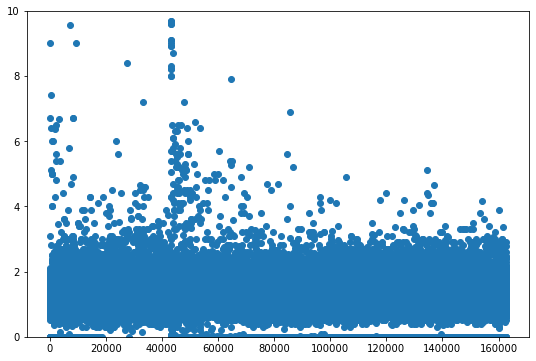

In [550]:
plt.scatter(np.arange(len(Target)), Target.values)
plt.ylim((0, 10))

In [551]:
# HDL filter
print(np.sum(Target > 3))
HDL_upper = Target[Target > 3].index

final_t2.drop(HDL_upper, axis=0, inplace=True)

422


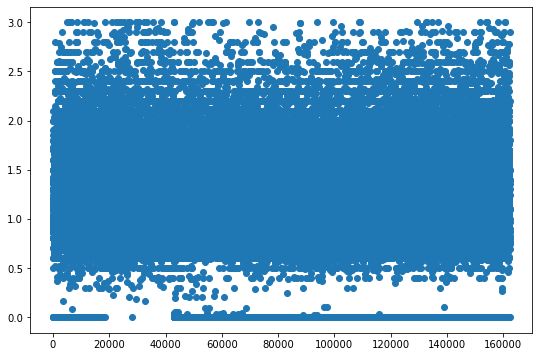

In [552]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['44P5.'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['44P5.'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

## LDL(mmol/L)

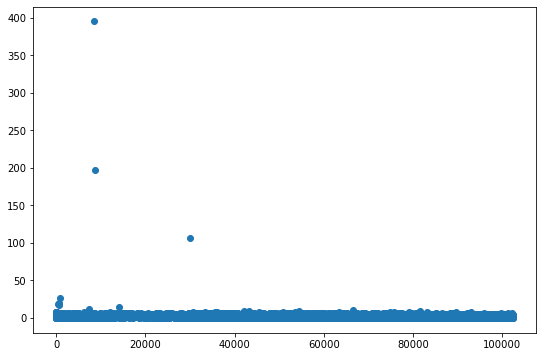

In [553]:
# LDL
# ['44P6.', '44P6.']
target = pd.concat([final_t2[final_t2['read_2'].isin(['44P6.'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['44P6.'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

(0, 10)

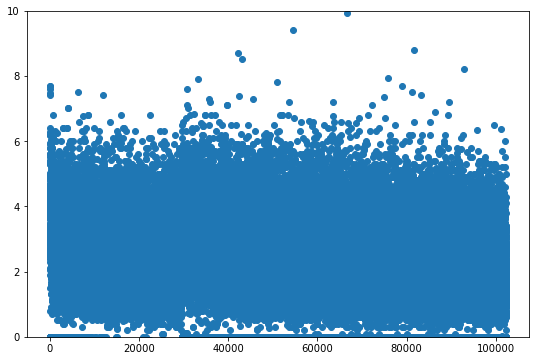

In [554]:
plt.scatter(np.arange(len(Target)), Target.values)
plt.ylim((0, 10))

In [555]:
# LDL filter
print(np.sum(Target > 8))
LDL_upper = Target[Target > 8].index

final_t2.drop(LDL_upper, axis=0, inplace=True)

16


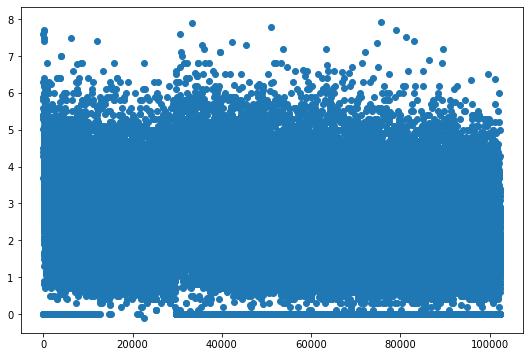

In [556]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['44P6.'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['44P6.'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

In [557]:
final_t2.shape

(16765514, 10)

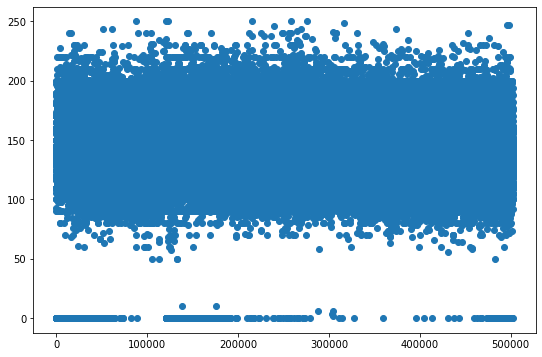

In [558]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['246..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['2469.'])]['value1']])
Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

In [559]:
final_t2.to_csv('filtered_final_t2.csv', index=None)